In [2]:
import matplotlib.pyplot as plt;
import seaborn as sns;
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline  
import numpy as np;
import glob

## Image Ingest

In [3]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [4]:
import os
arr = os.listdir("Data/Kernels")
print(arr)
print(len(arr))

['C2_04_1_1_Bright Field_008.tif', 'C2_03_1_1_Bright Field_004.tif', 'Unhealthy_cell_kernels']
3


## Set Healthy Kernel

C2_04_1_1_Bright Field_008.tif
C2_03_1_1_Bright Field_004.tif


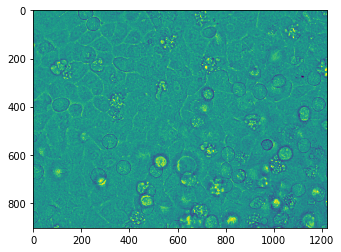

In [5]:
set_kernel = True;
invert_image = False;
im_loop = []

for name in arr:
    if name.endswith(".tif"):
        im = Image.open("Data/Kernels/"+ str(name))
        im_loop.append(np.asarray(im))
        print(name)
        imshow(im)
#imshow(np.asarray(im))
#im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
#if invert_image:
    #im_array_gray = (np.abs(255.0-im_array_gray))

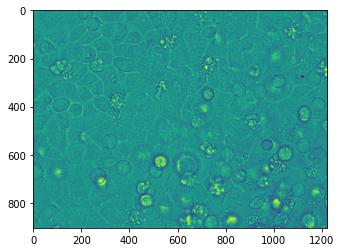

In [6]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

#im = Image.open("Data/Kernels/C2_03_1_1_Bright Field_004.tif");


# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(data.coins())
image = gaussian_filter(im, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')
im_array_gray = image; 
imshow(im_array_gray)

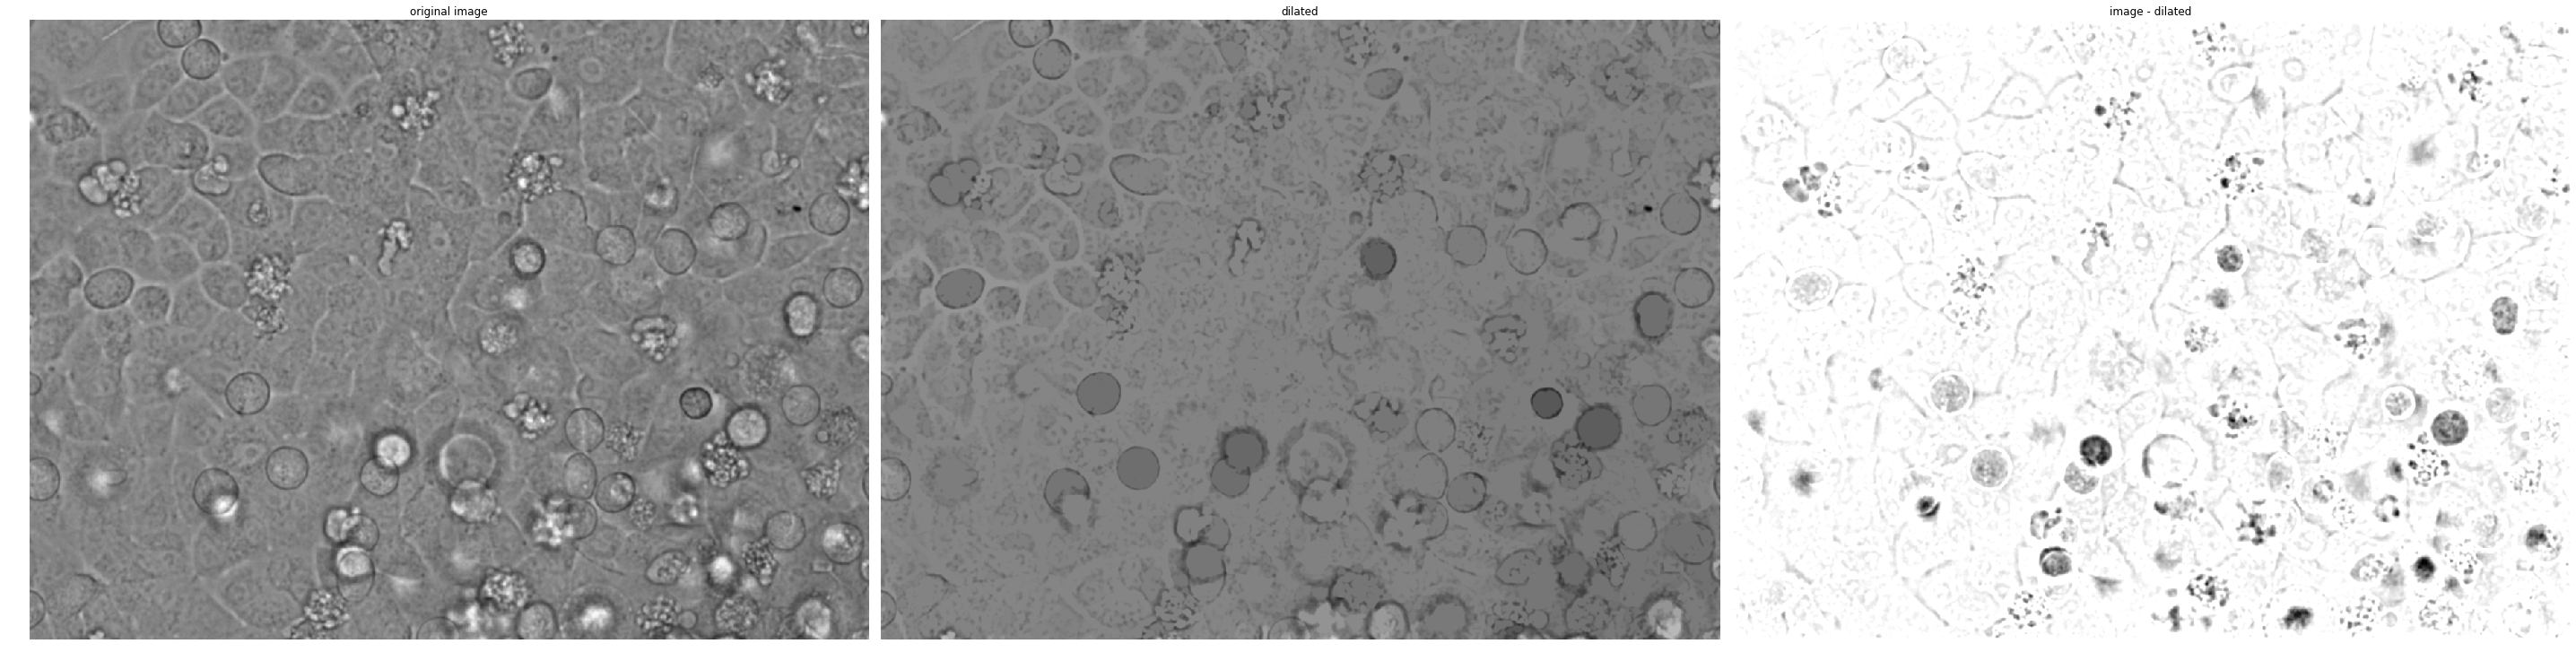

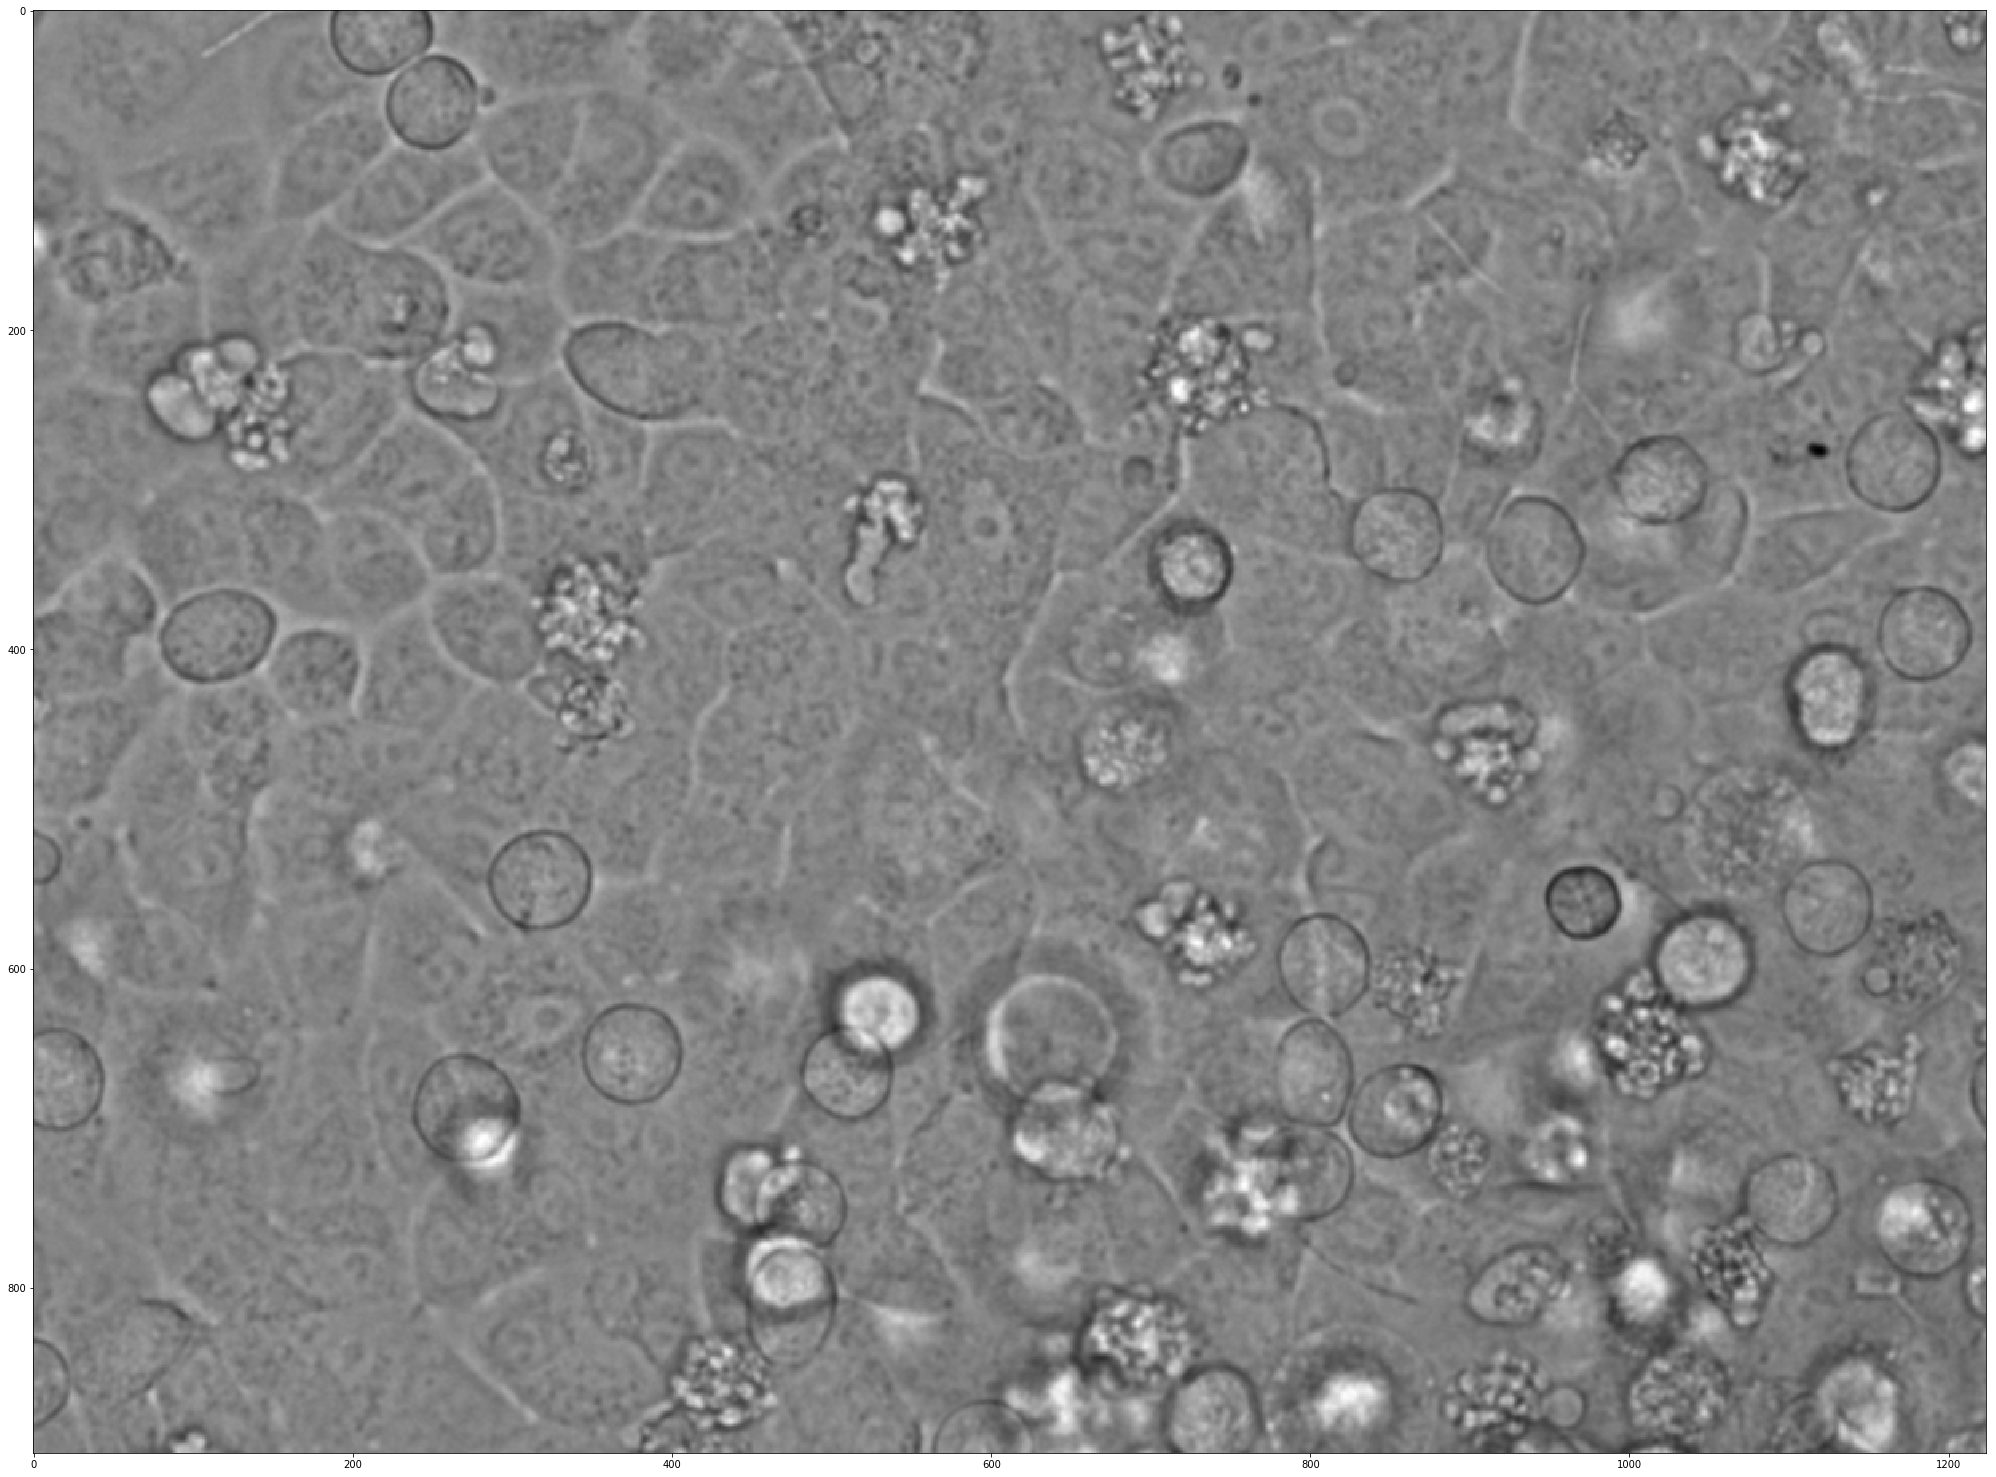

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                 ncols=3,
                                 figsize=(40, 10.5),
                                 sharex=True,
                                 sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow((dilated-image), cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

plt.figure(figsize=[35,35])
imshow(im_array_gray,cmap='gray')


In [8]:
#Healthy Cells
im = Image.open("Data/Kernels/C2_03_1_1_Bright Field_004.tif");

#imshow(np.asarray(im))
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
if invert_image:
    im_array_gray = (np.abs(255.0-im_array_gray))

im_array_gray_A549 = im_array_gray;


im = Image.open("Data/Kernels/C2_04_1_1_Bright Field_008.tif");
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
if invert_image:
    im_array_gray = (np.abs(255.0-im_array_gray))
im_array_gray_macrophage = im_array_gray;
im_array_gray_dendritic = im_array_gray;
    

In [9]:
# Unhealthy cells 

im = Image.open("Data/Kernels/Unhealthy_cell_kernels/C6_04_1_1_Bright Field_009.tif");

#imshow(np.asarray(im))
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
if invert_image:
    im_array_gray = (np.abs(255.0-im_array_gray))

im_array_gray_A549_UH = im_array_gray;


im = Image.open("Data/Kernels/Unhealthy_cell_kernels/C6_04_1_1_Bright Field_009.tif");
im_array_gray = np.asarray(im,dtype=np.float32)
#im_array_gray = rgb2gray(im_array);
if invert_image:
    im_array_gray = (np.abs(255.0-im_array_gray))
im_array_gray_macrophage_UH = im_array_gray;
im_array_gray_dendritic_UH = im_array_gray;
    

## Shaded Normal Kernel Extraction 

In [10]:
#set_kernel=True;
if set_kernel:
    #sample_kernel = np.array(im_array_gray[275:325,750:820])  # single healthy feature

    #sample_kernel = np.array(im_array_gray[340:370,320:350])  #pathogenecity feature 
    #sample_kernel = np.array(im_array_gray[190:235,590:630])  # single healthy feature

    #sample_kernel = np.array(im_array_gray[240:360,700:820])  # multiple healthy feature
    
    #Define Healthy A549s
    sample_kernel_healthy_A549 = np.array(im_array_gray_A549[75:180,350:410])
    sample_kernel_healthy_A549 = (np.mean(sample_kernel_healthy_A549,axis=None)-sample_kernel_healthy_A549)/(np.mean(sample_kernel_healthy_A549,axis=None))
    sample_kernel_healthy_A549[sample_kernel_healthy_A549<0.00] =0.0; 
    mask_sample_kernel_healthy_A549 = sample_kernel_healthy_A549;
    
    
    #Define Healthy Dendritic
    sample_kernel_healthy_dendritic = np.array(im_array_gray_dendritic[800:860,490:550]) #340:420,315:400
    sample_kernel_healthy_dendritic = (np.mean(sample_kernel_healthy_dendritic,axis=None)-sample_kernel_healthy_dendritic)/(np.mean(sample_kernel_healthy_dendritic,axis=None))
    sample_kernel_healthy_dendritic[sample_kernel_healthy_dendritic<0.00] =0.0; 
    mask_sample_kernel_healthy_dendritic = sample_kernel_healthy_dendritic;
    
    #Define Healthy Macrophages
    sample_kernel_healthy_macrophage = np.array(im_array_gray_macrophage[120:220,620:690])
    sample_kernel_healthy_macrophage = (np.mean(sample_kernel_healthy_macrophage,axis=None)-sample_kernel_healthy_macrophage)/(np.mean(sample_kernel_healthy_macrophage,axis=None))
    sample_kernel_healthy_macrophage[sample_kernel_healthy_macrophage<0.00] =0.0; 
    mask_sample_kernel_healthy_macrophage = sample_kernel_healthy_macrophage;

    
    #sample_kernel = (np.mean(sample_kernel,axis=None)-sample_kernel)/(np.mean(sample_kernel,axis=None))
    
    

In [11]:
#Unhealthy cells
if set_kernel:
    sample_kernel_unhealthy_A549 = np.array(im_array_gray_A549_UH[380:460,455:545])
    sample_kernel_unhealthy_A549 = (np.mean(sample_kernel_unhealthy_A549,axis=None)-sample_kernel_unhealthy_A549)/(np.mean(sample_kernel_unhealthy_A549,axis=None))
    sample_kernel_unhealthy_A549[sample_kernel_unhealthy_A549<0.00] =0.0; 
    mask_sample_kernel_unhealthy_A549 = sample_kernel_unhealthy_A549;
    
    #Define unHealthy Dendritic
    sample_kernel_unhealthy_dendritic = np.array(im_array_gray_dendritic_UH[770:870,600:690]) #340:420,315:400
    sample_kernel_unhealthy_dendritic = (np.mean(sample_kernel_unhealthy_dendritic,axis=None)-sample_kernel_unhealthy_dendritic)/(np.mean(sample_kernel_unhealthy_dendritic,axis=None))
    sample_kernel_unhealthy_dendritic[sample_kernel_unhealthy_dendritic<0.00] =0.0; 
    mask_sample_kernel_unhealthy_dendritic = sample_kernel_unhealthy_dendritic;
    
    #Define unHealthy Macrophages
    sample_kernel_unhealthy_macrophage = np.array(im_array_gray_macrophage_UH[570:630,75:125])
    sample_kernel_unhealthy_macrophage = (np.mean(sample_kernel_unhealthy_macrophage,axis=None)-sample_kernel_unhealthy_macrophage)/(np.mean(sample_kernel_unhealthy_macrophage,axis=None))
    sample_kernel_unhealthy_macrophage[sample_kernel_unhealthy_macrophage<0.00] =0.0; 
    mask_sample_kernel_unhealthy_macrophage = sample_kernel_unhealthy_macrophage;



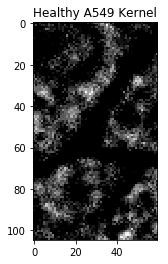

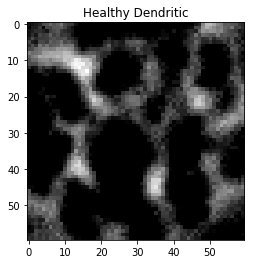

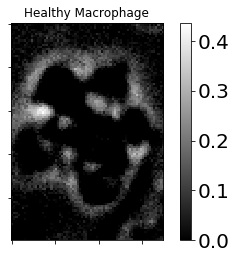

In [12]:
plt.figure()
imshow(np.abs(sample_kernel_healthy_A549),cmap='gray')
plt.title('Healthy A549 Kernel')
plt.figure()
imshow(np.abs(sample_kernel_healthy_dendritic),cmap='gray')
plt.title('Healthy Dendritic')
plt.figure()
imshow(np.abs(sample_kernel_healthy_macrophage),cmap='gray')
plt.title('Healthy Macrophage')


cbar = plt.colorbar()
ax = plt.gca()
ax.set_xticklabels({})
ax.set_yticklabels({})
cbar.ax.tick_params(labelsize=20) 

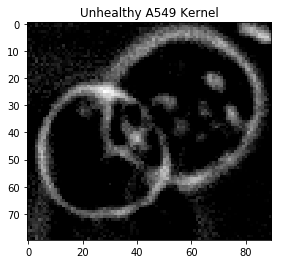

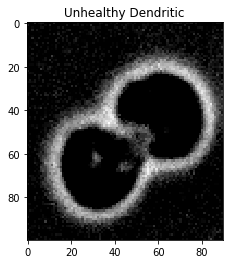

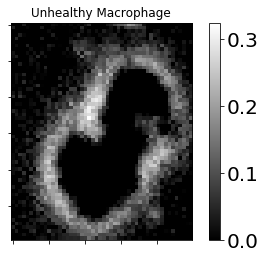

In [13]:
#Unhealthy cells plots
plt.figure()
imshow(np.abs(sample_kernel_unhealthy_A549),cmap='gray')
plt.title('Unhealthy A549 Kernel')
plt.figure()
imshow(np.abs(sample_kernel_unhealthy_dendritic),cmap='gray')
plt.title('Unhealthy Dendritic')
plt.figure()
imshow(np.abs(sample_kernel_unhealthy_macrophage),cmap='gray')
plt.title('Unhealthy Macrophage')


cbar = plt.colorbar()
ax = plt.gca()
ax.set_xticklabels({})
ax.set_yticklabels({})
cbar.ax.tick_params(labelsize=20) 

### Load Image Files to Analyze 

In [47]:
list_of_kernels = [mask_sample_kernel_healthy_A549,mask_sample_kernel_healthy_dendritic,mask_sample_kernel_healthy_macrophage,mask_sample_kernel_unhealthy_A549,mask_sample_kernel_unhealthy_dendritic,mask_sample_kernel_unhealthy_macrophage]
list_of_alphas = [3.75,13.0,5.1,8.5,8.2,11.25]
list_of_colors = ['g','b','c','r','m','y']

## Generate family of kernels: 
list_kernel_families = [];
for sample_kernel_ind in range(0,len(list_of_kernels)):
    mask_sample_kernel = list_of_kernels[sample_kernel_ind];
    base_angle = 0;
    kernel_family = [];
    for delta in range(base_angle,360,10):
        this_family_kernel_img= Image.fromarray(np.uint8(mask_sample_kernel * 255) ).rotate(angle=base_angle+delta)
        rotated_kernel = np.array(this_family_kernel_img,dtype=np.float32)/255.0
        kernel_family.append(rotated_kernel);
    list_kernel_families.append(kernel_family);    


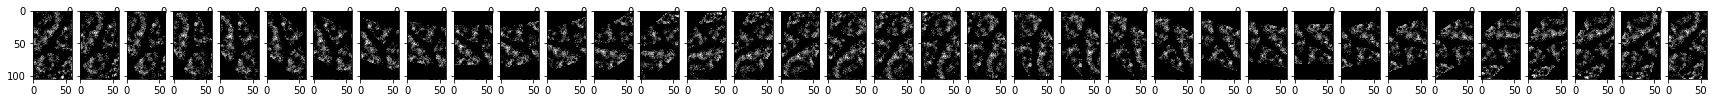

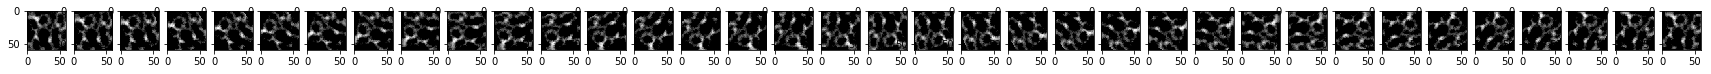

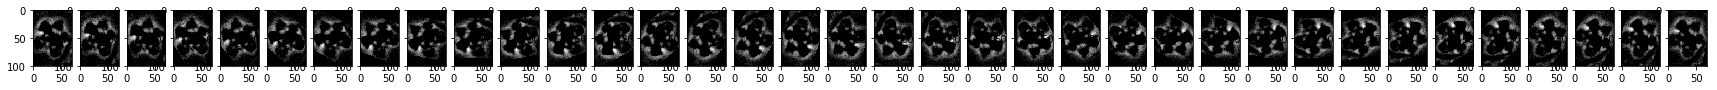

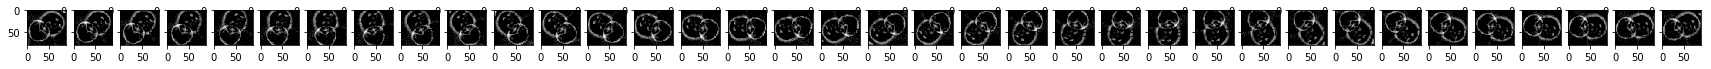

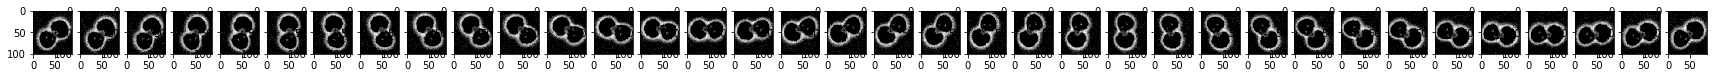

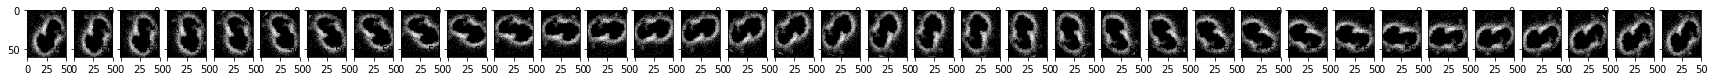

In [48]:
for kernel_family in list_kernel_families:
    
    figs,list_of_ax = plt.subplots(1,len(kernel_family))
    figs.set_size_inches((30,15))
    for ind in range(0,len(list_of_ax)):
        this_ax = list_of_ax[ind];
        plt.sca(this_ax)
        plt.imshow(kernel_family[ind],cmap='gray')
    #plt.show()


In [49]:
figs.get_size_inches()

array([30., 15.])

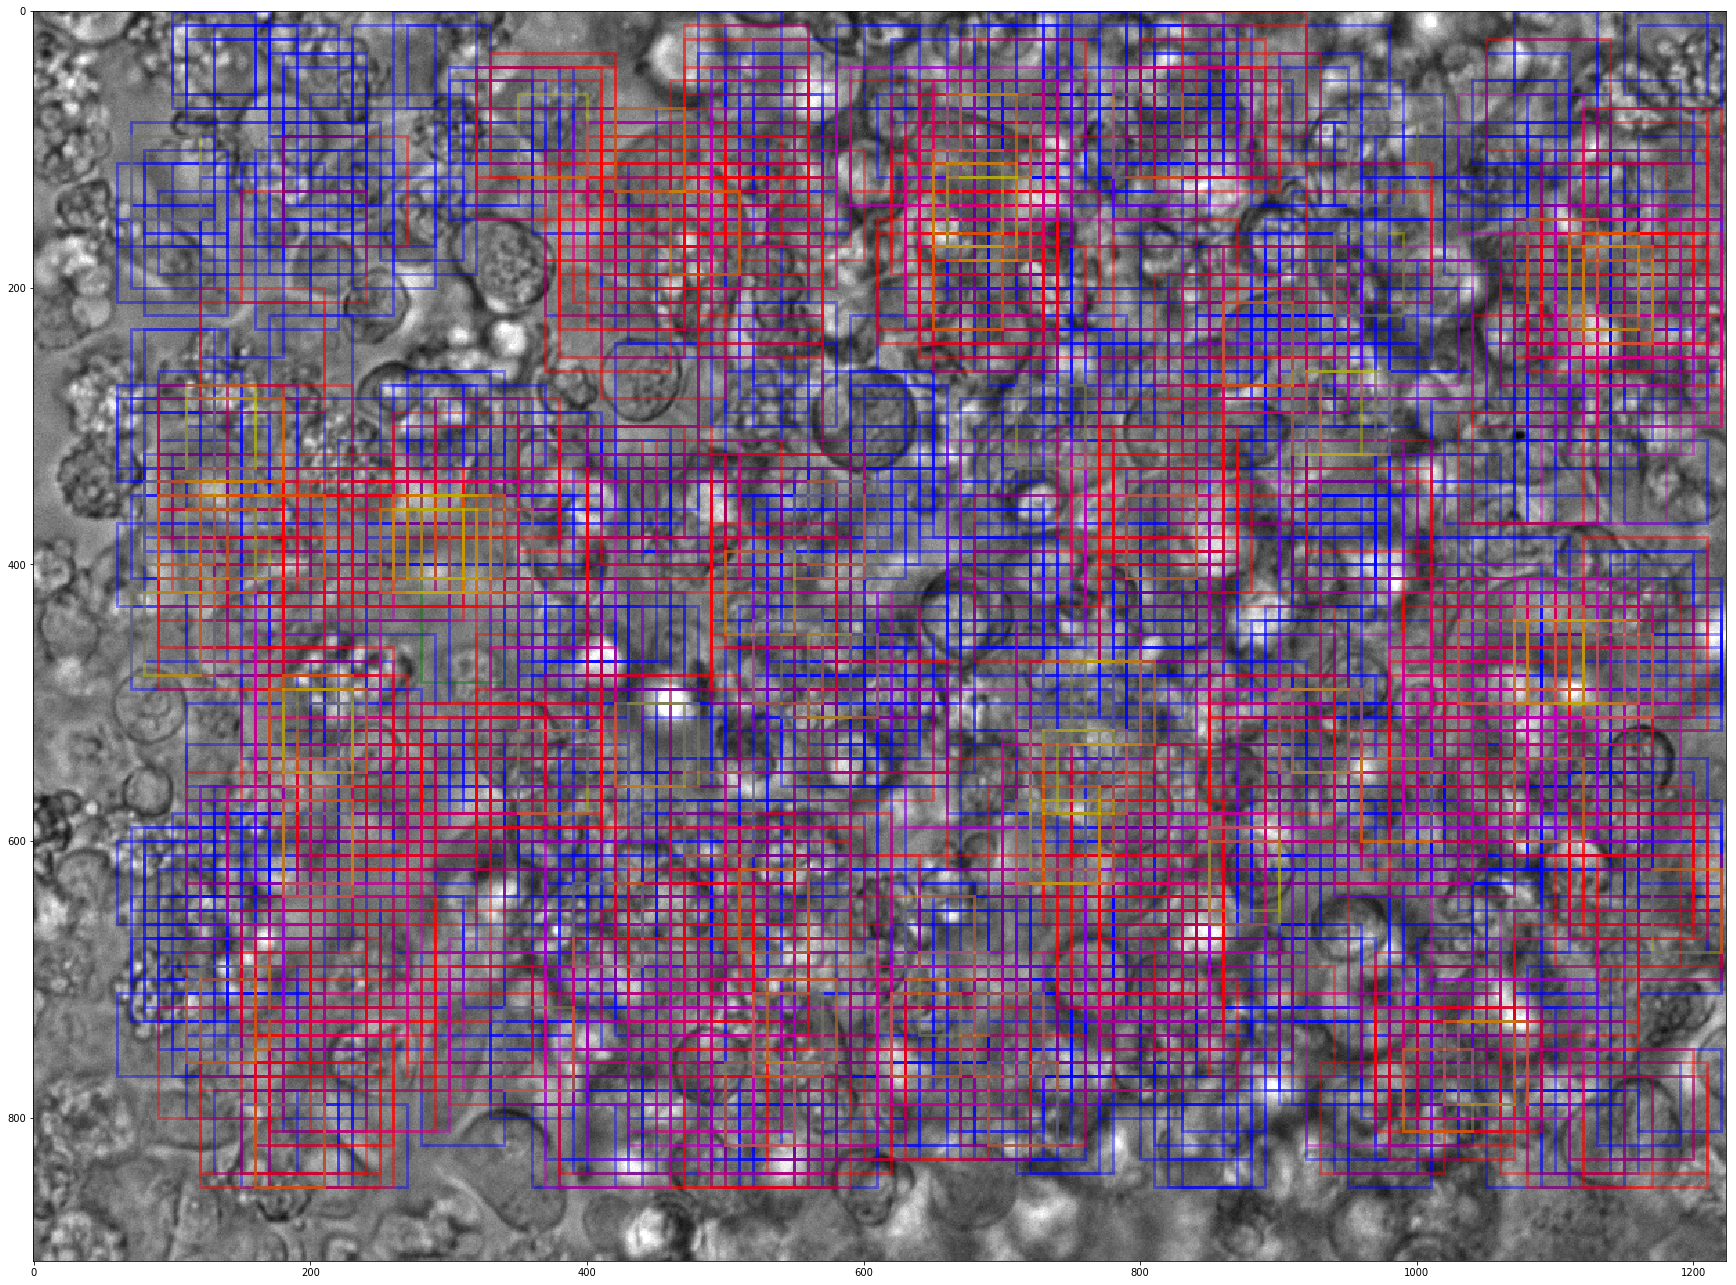

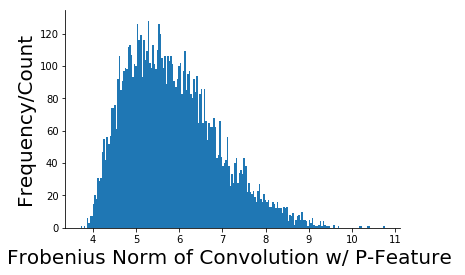

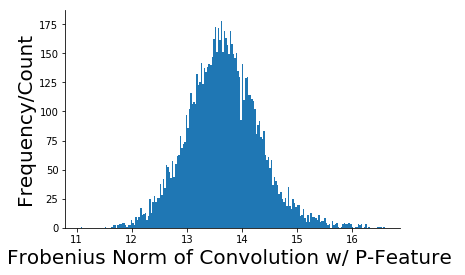

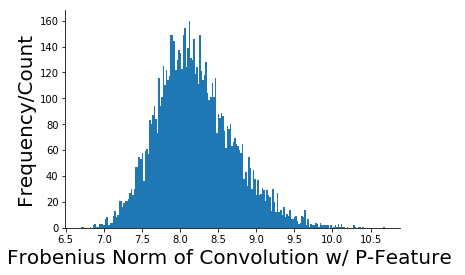

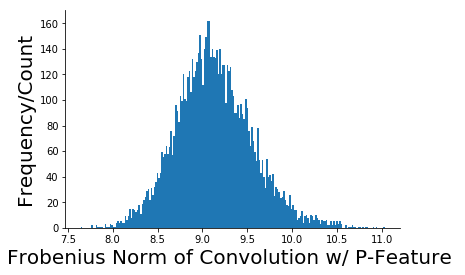

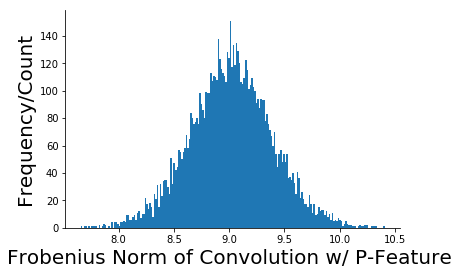

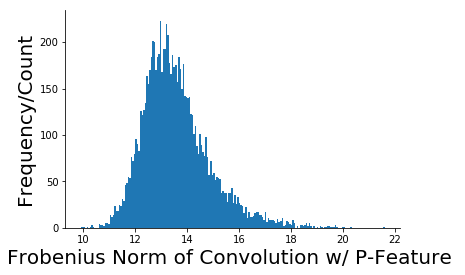

<Figure size 432x288 with 0 Axes>

In [53]:
invert_image = False
for time_index in range(1,9):
    
    filename_in = "Data/May172019Run/C2_03_1_1_Bright Field_00" + repr(time_index)+".tif";
    filename_out = "DataProcessed/May172019Run/C2_03_1_1_Bright Field_00" + repr(time_index)+".tif"
    im = Image.open(filename_in);
    im_array_gray = np.asarray(im,dtype=np.float32)
    if invert_image:
        im_array_gray = (np.abs(255.0-im_array_gray))

    ### Feature Extraction


    this_fig = plt.figure(figsize=(35,23));
    imshow(im_array_gray,cmap='gray')
    for sample_kernel_ind in range(0,len(list_of_kernels)):
        mask_sample_kernel = list_of_kernels[sample_kernel_ind];
        norm_alpha = list_of_alphas[sample_kernel_ind];
        this_color = list_of_colors[sample_kernel_ind];
        this_kernel_family = list_kernel_families[sample_kernel_ind];
        num_rows = im_array_gray.shape[0];
        num_cols = im_array_gray.shape[1];
        mask_rows = mask_sample_kernel.shape[0]
        mask_cols = mask_sample_kernel.shape[1];
        import matplotlib.patches as patches

        all_norms = [];
        all_rotated_norms = [];
        all_rects = [];
        Raw_Subimage_Count = 0;
        for row_ind in np.arange(0,num_rows-mask_rows-50,10):
            for col_ind in np.arange(mask_cols,num_cols-mask_cols,10):
                Raw_Subimage = np.array(im_array_gray[row_ind:row_ind+mask_rows,col_ind:col_ind+mask_cols]);
                Raw_Subimage = (np.mean(Raw_Subimage,axis=None)-Raw_Subimage)/(np.mean(Raw_Subimage,axis=None))
                Raw_Subimage[Raw_Subimage<0.0]=0.0;

                #Family of Kernel Processing Layer
                base_angle = 0;
                rotated_norms = [];
                for rotated_kernel in this_kernel_family:
                    #this_family_kernel_img= Image.fromarray(np.uint8(mask_sample_kernel * 255) ).rotate(angle=base_angle+delta)
                    #rotated_kernel = np.array(this_family_kernel_img,dtype=np.float32)/255.0        
                    temp_filtered_image = np.array(Raw_Subimage);
                    temp_filtered_image[rotated_kernel==0.0]=0.0;
                    this_norm = np.linalg.norm(rotated_kernel-temp_filtered_image,'fro')
                    rotated_norms.append(1e4*this_norm/(rotated_kernel.shape[0]*rotated_kernel.shape[1]));
                all_rotated_norms.append(rotated_norms);

                all_norms.append(np.min(rotated_norms));#[this_norm,col_ind,row_ind]);

                if norm_alpha>np.min(rotated_norms):#0.06<this_norm:                       
                    this_rect = patches.Rectangle((col_ind,row_ind),mask_cols,mask_rows,linewidth=3,edgecolor=this_color,facecolor='none',alpha=0.4);
                    all_rects.append(this_rect);
                    #plt.savefig('/Users/yeun666/Documents/FoFProcessedImages/Movies/Mar19/SubImage_' + repr(Raw_Subimage_Count) + '.jpg',dpi=500,format='jpeg')

                #Raw_Subimage_Count +=1;     
        ax = this_fig.gca()
        for rect in all_rects:
            ax.add_patch(rect)
        
        plt.figure()
        plt.hist(all_norms,bins=200);

        ax = plt.gca()

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        plt.ylabel('Frequency/Count',size=20)
        plt.xlabel('Frobenius Norm of Convolution w/ P-Feature ',size=20)
        
    
        
    plt.show()    
    plt.tight_layout()
    this_fig.savefig(filename_out);



In [51]:
fig = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [52]:
fig.savefig()

TypeError: savefig() missing 1 required positional argument: 'fname'